In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [53]:
df = pd.read_csv('combined.csv', parse_dates= {"Date" : ["Year","Month","Day"]})
df.drop(df.columns[1], axis=1, inplace=True)
df.drop(["Station", "Highest 30 Min Rainfall (mm)", "Highest 60 Min Rainfall (mm)", "Highest 120 Min Rainfall (mm)"], axis=1, inplace=True)

# may improve prediction - to test
# df['Month'] = pd.DatetimeIndex(df["Date"]).month

df

Date  Daily Rainfall Total (mm)  Mean Temperature (°C)  \
0    2019-04-01                       19.8                   27.0   
1    2019-04-02                        0.0                   27.9   
2    2019-04-03                       15.6                   26.8   
3    2019-04-04                        9.6                   28.2   
4    2019-04-05                        3.4                   27.6   
5    2019-04-06                        0.2                   28.2   
6    2019-04-07                        0.0                   28.7   
7    2019-04-08                        2.2                   28.5   
8    2019-04-09                       13.4                   28.1   
9    2019-04-10                        0.2                   28.0   
10   2019-04-11                        0.0                   27.7   
11   2019-04-12                        0.0                   28.5   
12   2019-04-13                        0.0                   29.5   
13   2019-04-14                       12.4                   27.5   
14   2019-04-15                        0.0                   29.2   
15   2019-04-16                        4.8                   29.1   
16   2019-04-17                        0.0                   29.7   
17   2019-04-18                        0.0                   29.6   
18   2019-04-19                        1.6                   28.9   
19   2019-04-20                        3.0                   27.5   
20   2019-04-21                        0.0                   28.6   
21   2019-04-22                        0.2                   28.6   
22   2019-04-23                       41.4                   26.9   
23   2019-04-24                        0.0                   27.9   
24   2019-04-25                        5.0                   27.8   
25   2019-04-26                       33.0                   25.5   
26   2019-04-27                        8.4                   27.2   
27   2019-04-28                        0.0                   28.6   
28   2019-04-29                        1.2                   28.3   
29   2019-04-30                        0.0                   28.0   
30   2020-04-01                        0.0                   29.2   
31   2020-04-02                       17.0                   28.2   
32   2020-04-03                       38.6                   27.5   
33   2020-04-04                        4.0                   28.1   
34   2020-04-05                        3.0                   27.4   
35   2020-04-06                        4.6                   26.9   
36   2020-04-07                       71.8                   26.7   
37   2020-04-08                       23.4                   27.6   
38   2020-04-09                        0.2                   28.6   
39   2020-04-10                        0.0                   28.7   
40   2020-04-11                        0.0                   28.6   
41   2020-04-12                        0.2                   28.4   
42   2020-04-13                        2.6                   27.6   
43   2020-04-14                        0.0                   29.1   
44   2020-04-15                        0.0                   29.3   
45   2020-04-16                        0.0                   29.3   
46   2020-04-17                        0.0                   29.4   
47   2020-04-18                        6.4                   28.9   
48   2020-04-19                        0.0                   30.1   
49   2020-04-20                        0.0                   30.0   
50   2020-04-21                       12.2                   28.4   
51   2020-04-22                        0.2                   29.2   
52   2020-04-23                        8.0                   27.6   
53   2020-04-24                       67.2                   26.8   
54   2020-04-25                       15.8                   26.9   
55   2020-04-26                        0.2                   26.6   
56   2020-04-27                        7.8                   26.6   
57   2020

In [54]:
df = df.replace('-', np.nan)
df["Mean Wind Speed (km/h)"] = df["Mean Wind Speed (km/h)"].astype(float)
df["Max Wind Speed (km/h)"] = df["Max Wind Speed (km/h)"].astype(float)
df.dtypes

Date                         datetime64[ns]
Daily Rainfall Total (mm)           float64
Mean Temperature (°C)               float64
Maximum Temperature (°C)            float64
Minimum Temperature (°C)            float64
Mean Wind Speed (km/h)              float64
Max Wind Speed (km/h)               float64
dtype: object

In [55]:
for col in df.columns:
    try:
        df[col] = df[col].replace(np.nan, df[col].mean())
    except:
        print(col)
df

Date  Daily Rainfall Total (mm)  Mean Temperature (°C)  \
0    2019-04-01                       19.8                   27.0   
1    2019-04-02                        0.0                   27.9   
2    2019-04-03                       15.6                   26.8   
3    2019-04-04                        9.6                   28.2   
4    2019-04-05                        3.4                   27.6   
5    2019-04-06                        0.2                   28.2   
6    2019-04-07                        0.0                   28.7   
7    2019-04-08                        2.2                   28.5   
8    2019-04-09                       13.4                   28.1   
9    2019-04-10                        0.2                   28.0   
10   2019-04-11                        0.0                   27.7   
11   2019-04-12                        0.0                   28.5   
12   2019-04-13                        0.0                   29.5   
13   2019-04-14                       12.4                   27.5   
14   2019-04-15                        0.0                   29.2   
15   2019-04-16                        4.8                   29.1   
16   2019-04-17                        0.0                   29.7   
17   2019-04-18                        0.0                   29.6   
18   2019-04-19                        1.6                   28.9   
19   2019-04-20                        3.0                   27.5   
20   2019-04-21                        0.0                   28.6   
21   2019-04-22                        0.2                   28.6   
22   2019-04-23                       41.4                   26.9   
23   2019-04-24                        0.0                   27.9   
24   2019-04-25                        5.0                   27.8   
25   2019-04-26                       33.0                   25.5   
26   2019-04-27                        8.4                   27.2   
27   2019-04-28                        0.0                   28.6   
28   2019-04-29                        1.2                   28.3   
29   2019-04-30                        0.0                   28.0   
30   2020-04-01                        0.0                   29.2   
31   2020-04-02                       17.0                   28.2   
32   2020-04-03                       38.6                   27.5   
33   2020-04-04                        4.0                   28.1   
34   2020-04-05                        3.0                   27.4   
35   2020-04-06                        4.6                   26.9   
36   2020-04-07                       71.8                   26.7   
37   2020-04-08                       23.4                   27.6   
38   2020-04-09                        0.2                   28.6   
39   2020-04-10                        0.0                   28.7   
40   2020-04-11                        0.0                   28.6   
41   2020-04-12                        0.2                   28.4   
42   2020-04-13                        2.6                   27.6   
43   2020-04-14                        0.0                   29.1   
44   2020-04-15                        0.0                   29.3   
45   2020-04-16                        0.0                   29.3   
46   2020-04-17                        0.0                   29.4   
47   2020-04-18                        6.4                   28.9   
48   2020-04-19                        0.0                   30.1   
49   2020-04-20                        0.0                   30.0   
50   2020-04-21                       12.2                   28.4   
51   2020-04-22                        0.2                   29.2   
52   2020-04-23                        8.0                   27.6   
53   2020-04-24                       67.2                   26.8   
54   2020-04-25                       15.8                   26.9   
55   2020-04-26                        0.2                   26.6   
56   2020-04-27                        7.8                   26.6   
57   2020

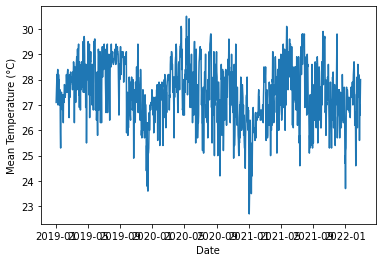

In [3]:
sns.lineplot(y = df["Mean Temperature (°C)"], x = df['Date'])
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller
def ADF_Cal(x):
    result = adfuller(x)
    ADF_stat = result[0]
    p = result[1]
    print("ADF Statistic: %f" % ADF_stat)
    print("p-value: %f" % p)
    print("Critical Values")
    levels = [.01, .05, .1]
    i = 0
    for key,value in result[4].items():
        print('\t%s: %.3f' % (key,value))
        hyp = p < levels[i]
        if ADF_stat < value:
            cert = (1-levels[i])*100
            print("{}% certain this is stationary".format(cert))
            print('Reject H0: {}'.format(hyp))
            break
        i = i+1
        if i >= 3:
            print("Less than 90% certain that data is stationary")
            print('Reject H0: {}'.format(hyp))
print("Calculating ADF test for Mean Temperature (°C)...")
ADF_Cal(df["Mean Temperature (°C)"])

Calculating ADF test for Mean Temperature (°C)...
ADF Statistic: -8.377260
p-value: 0.000000
Critical Values
	1%: -3.436
99.0% certain this is stationary
Reject H0: True


In [5]:
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    date = data["Date"].to_frame()
    data = data.drop(["Date"], axis=1)
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = [date], ["Date"]
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [f"{name} - {i}" for name in list(df)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [f"{name}" for name in list(df)]
        else:
            names += [f"{name} + {i}" for name in list(df)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [56]:
df = series_to_supervised(df, 7)

In [57]:
df

Date  Daily Rainfall Total (mm) - 7  Mean Temperature (°C) - 7  \
7    2019-04-08                           19.8                       27.0   
8    2019-04-09                            0.0                       27.9   
9    2019-04-10                           15.6                       26.8   
10   2019-04-11                            9.6                       28.2   
11   2019-04-12                            3.4                       27.6   
12   2019-04-13                            0.2                       28.2   
13   2019-04-14                            0.0                       28.7   
14   2019-04-15                            2.2                       28.5   
15   2019-04-16                           13.4                       28.1   
16   2019-04-17                            0.2                       28.0   
17   2019-04-18                            0.0                       27.7   
18   2019-04-19                            0.0                       28.5   
19   2019-04-20                            0.0                       29.5   
20   2019-04-21                           12.4                       27.5   
21   2019-04-22                            0.0                       29.2   
22   2019-04-23                            4.8                       29.1   
23   2019-04-24                            0.0                       29.7   
24   2019-04-25                            0.0                       29.6   
25   2019-04-26                            1.6                       28.9   
26   2019-04-27                            3.0                       27.5   
27   2019-04-28                            0.0                       28.6   
28   2019-04-29                            0.2                       28.6   
29   2019-04-30                           41.4                       26.9   
30   2020-04-01                            0.0                       27.9   
31   2020-04-02                            5.0                       27.8   
32   2020-04-03                           33.0                       25.5   
33   2020-04-04                            8.4                       27.2   
34   2020-04-05                            0.0                       28.6   
35   2020-04-06                            1.2                       28.3   
36   2020-04-07                            0.0                       28.0   
37   2020-04-08                            0.0                       29.2   
38   2020-04-09                           17.0                       28.2   
39   2020-04-10                           38.6                       27.5   
40   2020-04-11                            4.0                       28.1   
41   2020-04-12                            3.0                       27.4   
42   2020-04-13                            4.6                       26.9   
43   2020-04-14                           71.8                       26.7   
44   2020-04-15                           23.4                       27.6   
45   2020-04-16                            0.2                       28.6   
46   2020-04-17                            0.0                       28.7   
47   2020-04-18                            0.0                       28.6   
48   2020-04-19                            0.2                       28.4   
49   2020-04-20                            2.6                       27.6   
50   2020-04-21                            0.0                       29.1   
51   2020-04-22                            0.0                       29.3   
52   2020-04-23                            0.0                       29.3   
53   2020-04-24                            0.0                       29.4   
54   2020-04-25                            6.4                       28.9   
55   2020-04-26                            0.0                       30.1   
56   2020-04-27                            0.0                       30.0   
57   2020-04-28                           12.2                       28.4   
58   20

In [58]:
df_date = df['Date'].to_frame()
df = df.drop(['Date'], axis=1)

In [12]:
def random_forest_forecast(train, test):
    trainX, trainy = train.drop(["Daily Rainfall Total (mm)"], axis=1).to_numpy(), train["Daily Rainfall Total (mm)"].to_numpy()
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    testX = test.drop(["Daily Rainfall Total (mm)"], axis=1).to_numpy()
    yhat = model.predict(testX)
    return yhat

In [64]:
def walk_forward_validation(data, n_train=60, n_test=1):
    predictions = []
    actual = []
    for i in range(n_train, data.shape[0] - n_test):
        train, test = data.iloc[: i+1], data.iloc[i+1: i+1+n_test]
        yhat = random_forest_forecast(train, test)
        predictions.append(yhat)
        actual.append(test["Daily Rainfall Total (mm)"].to_numpy())
        for y, yhat in zip(actual[-n_test:], predictions[-n_test:]):
            print(f"Expected: {y}, Predicted: {yhat}")
    error = mean_absolute_error(actual, predictions)
    return error, actual, predictions

In [59]:
train, test = df.iloc[:-31], df.iloc[-31:]
trainX, trainy = train.drop(["Daily Rainfall Total (mm)"], axis=1).to_numpy(), train["Daily Rainfall Total (mm)"].to_numpy()
testX, testy = test.drop(["Daily Rainfall Total (mm)"], axis=1).to_numpy(), test["Daily Rainfall Total (mm)"].to_numpy()
model = RandomForestRegressor(n_estimators=1000)
model.fit(trainX, trainy)
yhat = model.predict(testX)
error = mean_absolute_error(testy, yhat)
print(error)

5.663858064516126


In [ ]:
mse, actual, predictions = walk_forward_validation(df)

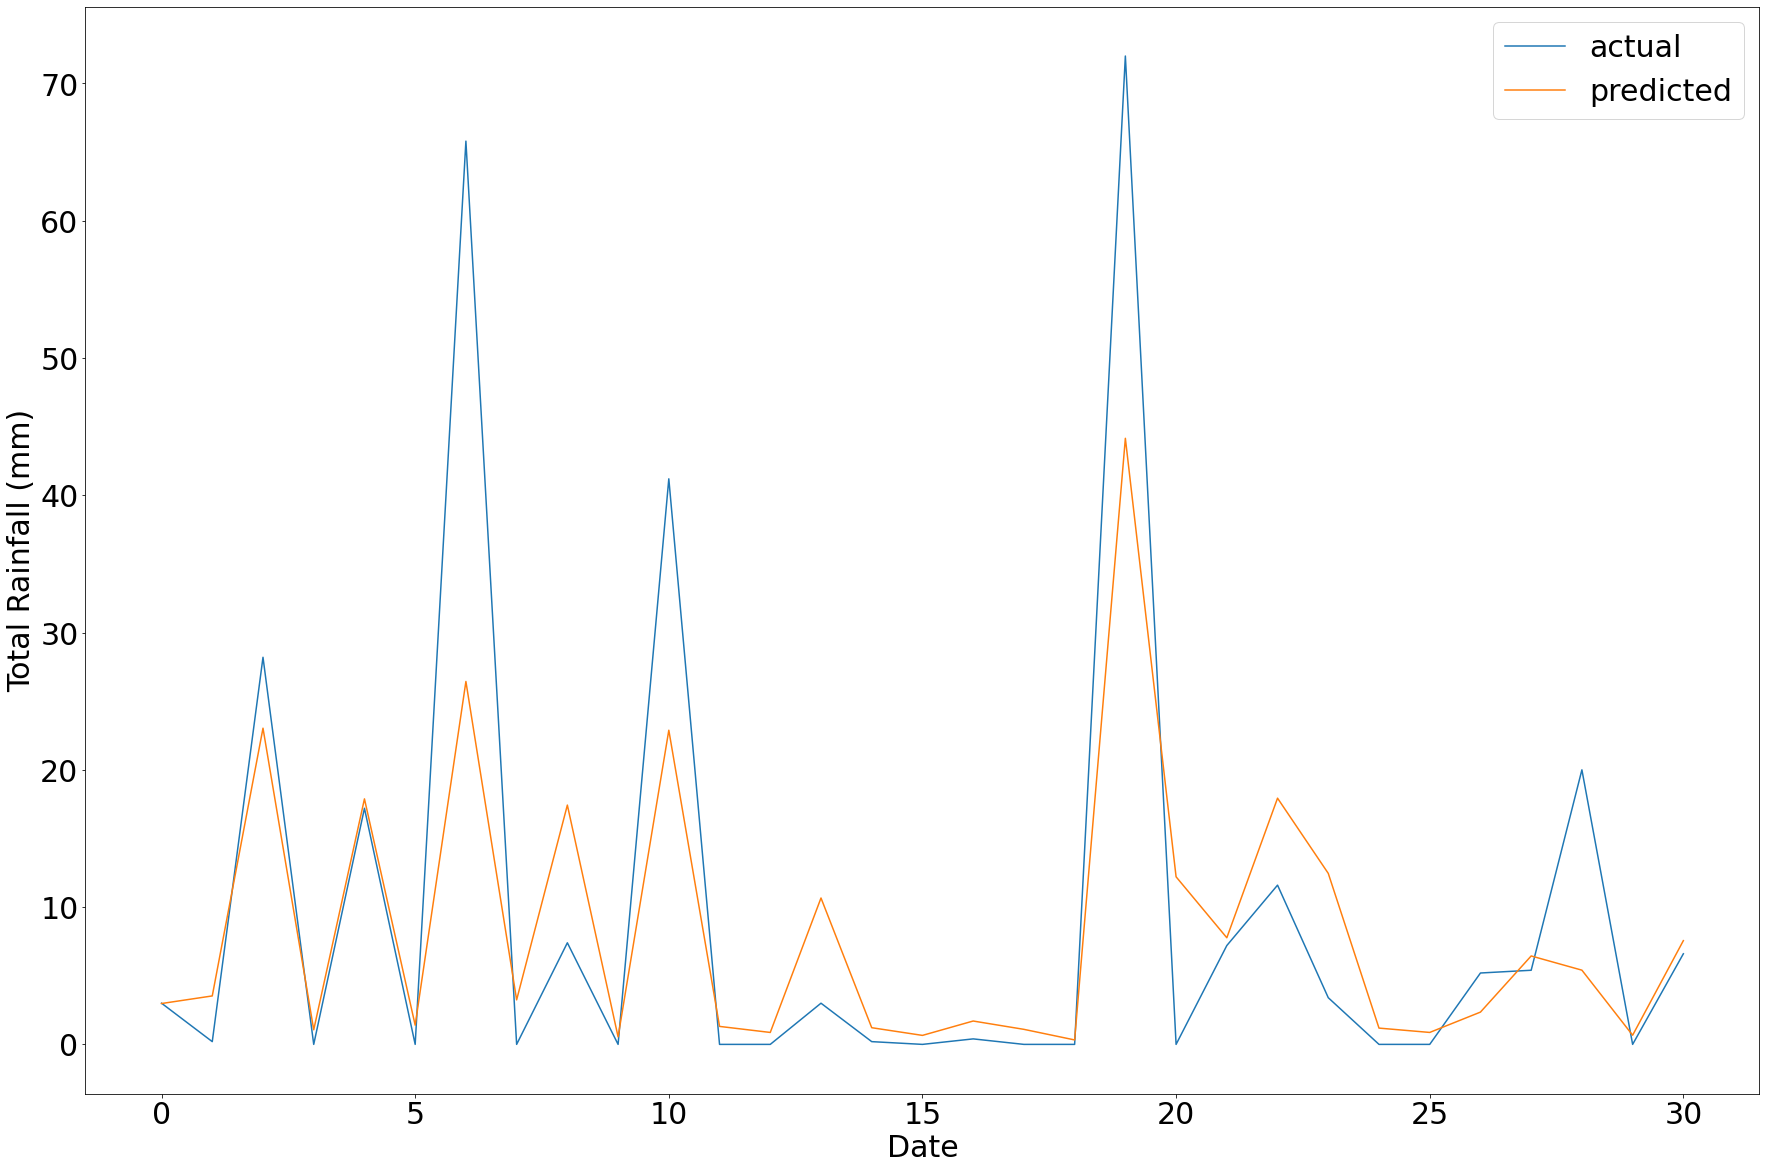

In [81]:
fig, ax = plt.subplots(figsize=(30, 20))
ax.set_xlabel('Time Period', fontsize=30)
ax.set_ylabel('Total Rainfall (mm)', fontsize=30)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(30)
date_test = df_date.iloc[-31:]
plt.plot(testy, label='actual')
plt.plot(yhat, label='predicted')
plt.legend(prop={"size":30})
plt.show()